<a href="https://colab.research.google.com/github/Andreagazy/Machine-Learning-2024/blob/main/Praktikum%2011%20-%20CNN/Tugas_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tugas
Buatlah model CNN berdasarkan dataset citra LFW.

### Impor Library

In [1]:
import tensorflow as tf
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

### Load Data

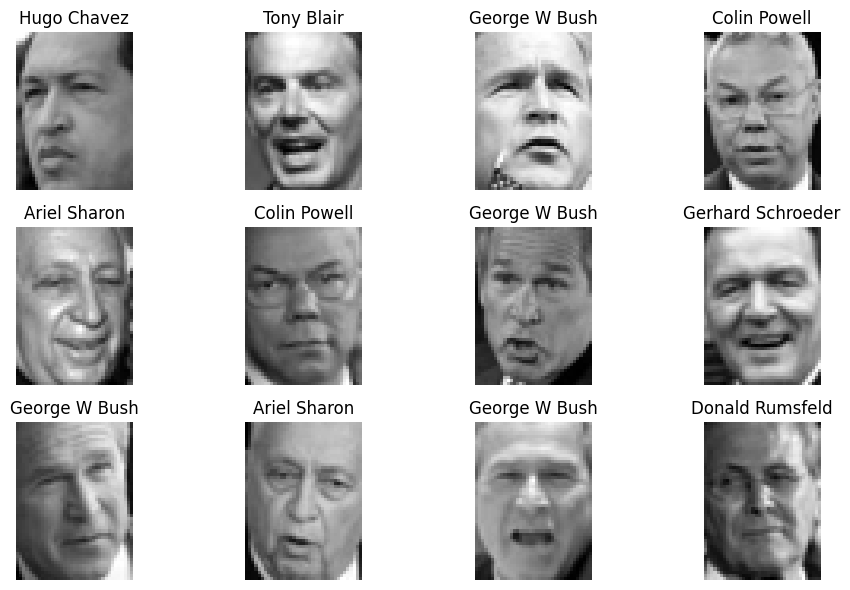

In [2]:
data = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = data.images  # Image data
y = data.target  # Labels
class_names = data.target_names

# Display example images
plt.figure(figsize=(10, 6))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(X[i], cmap='gray')
    plt.title(class_names[y[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

### Split Data

In [3]:
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

### Model

In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),  # input_shape now includes channels
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Train & Evaluasi Model



Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8266 - loss: 0.4596 - val_accuracy: 0.7330 - val_loss: 0.8072
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8701 - loss: 0.3593 - val_accuracy: 0.8010 - val_loss: 0.6599
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8695 - loss: 0.4024 - val_accuracy: 0.8252 - val_loss: 0.5849
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8789 - loss: 0.3546 - val_accuracy: 0.8204 - val_loss: 0.6338
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8799 - loss: 0.3730 - val_accuracy: 0.7767 - val_loss: 0.7095
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8692 - loss: 0.3628 - val_accuracy: 0.8204 - val_loss: 0.6323
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8855 - loss: 0.2909 - val_accuracy: 0.8204 - val_loss: 0.6468
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8942 - loss: 0.3144 - val_accuracy: 0.8252 - va

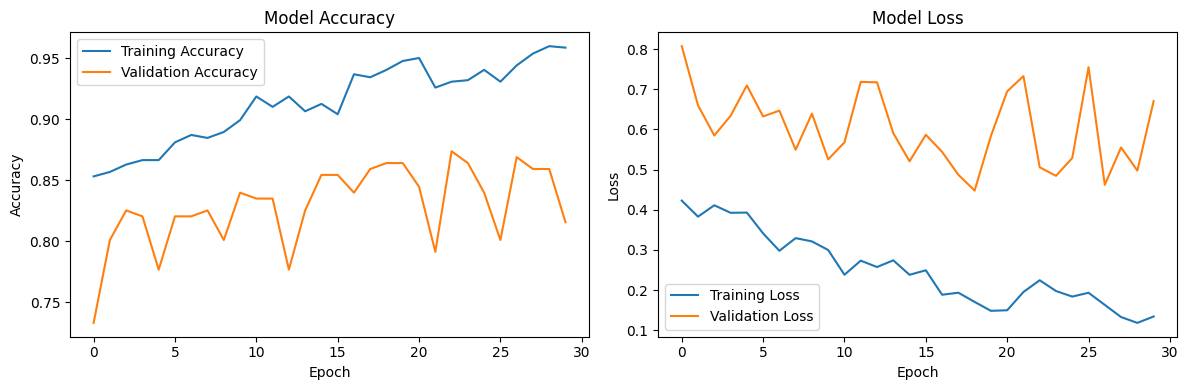

9/9 - 1s - 69ms/step - accuracy: 0.8527 - loss: 0.5123
Test Accuracy: 0.85


In [6]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32
)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.2f}")